In [1]:
# ------------------------------------------------------------------------
#
# TITLE - investigate_sgr_orbit.ipynb
# AUTHOR - James Lane
# PROJECT - AST1501
#
# ------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Investigate the Sgr orbits for doing a Dehnen evolution
'''

__author__ = "James Lane"

In [14]:
### Imports

## Basic
%run ../../src/_helpers/basic_imports.py

## galpy
from galpy import orbit
from galpy import potential

# scipy
import scipy.signal

## Project-specific
sys.path.insert(0,'../../src/')
import ast1501.coordinates

Basic imports:
numpy as np, pdb, sys, os, copy, glob, subprocess,
matplotlib.pyplot as plt, matplotlib as mpl, astropy.units as apu


In [3]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

# Make potential

In [5]:
pot = potential.MWPotential2014

# Make the Sgr orbit

In [6]:
helio_vx = -11.1
helio_vy = 12.24 + 220
helio_vz = 7.25
helio_R = 8.2
helio_z = 0.023

sgr_x, sgr_y, sgr_z = [-25.2,2.5,-6.4]
sgr_u, sgr_v, sgr_w = [-221.3,-266.5,197.4]

sgr_x += helio_R
sgr_z += helio_z
sgr_vx = sgr_u + helio_vx
sgr_vy = sgr_v + helio_vy
sgr_vz = sgr_w + helio_vz

sgr_R = np.sqrt( np.square(sgr_x) + np.square(sgr_y) )
sgr_phi = ast1501.coordinates.calculate_galactic_azimuth(sgr_x,sgr_y,cw=True,lh=True)
sgr_vR = sgr_vx * np.cos(sgr_phi) + sgr_vy * np.sin(sgr_phi)
sgr_vT = -sgr_vx * np.sin(sgr_phi) + sgr_vy * np.cos(sgr_phi)

In [7]:
# Make the orbit
sgr_vxvv = [sgr_R*apu.kpc, sgr_vR*apu.km/apu.s, sgr_vT*apu.km/apu.s, 
            sgr_z*apu.kpc, sgr_vz*apu.km/apu.s, sgr_phi*apu.rad]
o_sgr = orbit.Orbit(sgr_vxvv)
o_sgr.turn_physical_on()
# No need to flip because backward time integration

In [19]:
# Define potential and times
pot = potential.MWPotential2014

n_snaps = 1500
t_orbit = -14 # Gyr, integrating backwards
times = np.linspace(0, t_orbit, n_snaps) * apu.Gyr

In [9]:
# Properties of the satellite
sgr_m = (14*(10**10))*apu.Msun
sgr_a = 13*apu.kpc
sgr_halo = potential.HernquistPotential(amp=sgr_m, a=sgr_a)
sgr_stlr = potential.HernquistPotential( (6.4*10**8)*apu.M_sun, 0.85*apu.kpc )
sgr_pot = [sgr_halo,sgr_stlr]
sgr_dynfric = potential.ChandrasekharDynamicalFrictionForce(
    GMs=sgr_m, rhm=(1+np.sqrt(2))*sgr_a, dens=pot)
pot_df = [pot,sgr_dynfric]

In [20]:
o_sgr.integrate(times, pot_df)

In [21]:
apocenter_indxs = scipy.signal.argrelextrema(o_sgr.r(times).value, np.greater)

In [22]:
print(times[apocenter_indxs])

[ -0.89659773  -3.52101401 -10.50700467] Gyr


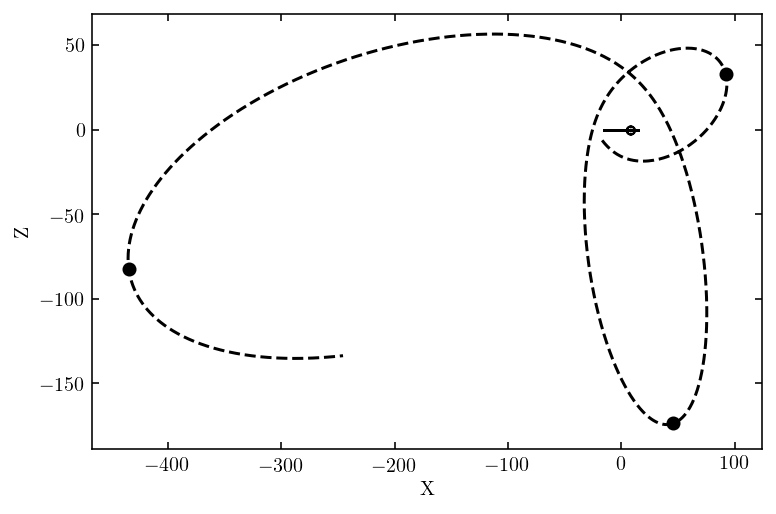

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot( o_sgr.x(times).value, o_sgr.z(times).value, color='Black', linestyle='dashed' )
ax.scatter( o_sgr.x(times)[apocenter_indxs].value, o_sgr.z(times)[apocenter_indxs].value, 
           color='Black' )
ax.plot([-15,15],[0,0], color='Black', linestyle='solid')
ax.scatter(8,0, marker=r'$\odot$', s=20, color='Black')
ax.set_xlabel('X')
ax.set_ylabel('Z')

fig.set_facecolor('White')

In [28]:
o_sgr_apos = o_sgr(times[apocenter_indxs])

In [31]:
print( times[apocenter_indxs] )
print( o_sgr_apos.R() )
print( o_sgr_apos.vR() )
print( o_sgr_apos.vT() )
print( o_sgr_apos.z() )
print( o_sgr_apos.vz() )
print( o_sgr_apos.phi() )

[ -0.89659773  -3.52101401 -10.50700467] Gyr
[ 92.85124982  60.32806915 435.91101037] kpc
[ 19.78058675 -32.57357997   5.14183721] km / s
[15.30707071 33.85842837  6.64047596] km / s
[  32.83873373 -173.8798696   -82.75460494] kpc
[-58.37055415 -11.04793127  27.29222945] km / s
[-0.13080416  0.71122156  3.063826  ] rad
